# Statistical Analysis of Breast Cancer Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('Cancer_dataset2.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## Data Preprocessing
Checking for missing values and data types.

In [4]:
# Check for missing values and data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     1300 non-null   int64 
 1   Race                    1300 non-null   object
 2   Marital Status          1300 non-null   object
 3   T Stage                 1300 non-null   object
 4   N Stage                 1300 non-null   object
 5   6th Stage               1300 non-null   object
 6   differentiate           1300 non-null   object
 7   Grade                   1300 non-null   object
 8   A Stage                 1300 non-null   object
 9   Tumor Size              1300 non-null   int64 
 10  Estrogen Status         1300 non-null   object
 11  Progesterone Status     1300 non-null   object
 12  Regional Node Examined  1300 non-null   int64 
 13  Reginol Node Positive   1300 non-null   int64 
 14  Survival Months         1300 non-null   int64 
 15  Stat

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


# ***MODULE 1***

## Measures of Central Tendency
Calculating Mean, Median, and Mode.

In [5]:
# Compute central tendency measures
mean_values = df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']].mean()
median_values = df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']].median()
mode_values = df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']].mode().iloc[0]
mean_values, median_values, mode_values

(Age                       53.953077
 Tumor Size                30.598462
 Regional Node Examined    14.417692
 Reginol Node Positive      4.359231
 Survival Months           72.123077
 dtype: float64,
 Age                       54.5
 Tumor Size                24.0
 Regional Node Examined    14.0
 Reginol Node Positive      2.0
 Survival Months           75.0
 dtype: float64,
 Age                       46.0
 Tumor Size                25.0
 Regional Node Examined    14.0
 Reginol Node Positive      1.0
 Survival Months           73.0
 Name: 0, dtype: float64)

## Mean Deviation Calculation

In [6]:
# Compute mean deviation
mean_deviation = (df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']] - df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']].mean()).abs().mean()
mean_deviation

,0
Age,7.649089
Tumor Size,16.017602
Regional Node Examined,6.424954
Reginol Node Positive,3.760847
Survival Months,18.968994


## Measures of Dispersion: ##
 Range, Quartiles, Variance, Standard Deviation, Standard Error, Mean Deviation, Coefficient of Variation, Percentiles

In [14]:
#select column containing numrical value
data = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']
selected_df = df[data]

# Initialize a dictionary to hold the results
dispersion_stats = {}

# Calculate each measure for each column
for col in data:
    series = selected_df[col].dropna()
    mean = series.mean()
    std = series.std(ddof=1) # Sample variance

    dispersion_stats[col] = {
        'Range': series.max() - series.min(),
        'Q1 (25%)': series.quantile(0.25),
        'Median (Q2)': series.median(),
        'Q3 (75%)': series.quantile(0.75),
        'Variance': series.var(ddof=1),
        'Standard Deviation': std,
        'Standard Error': std / np.sqrt(len(series)),
        'Mean Deviation': np.mean(np.abs(series - mean)),
        'Coefficient of Variation (%)': (std / mean) * 100 if mean != 0 else np.nan,
        '10th Percentile': np.percentile(series, 10),
        '90th Percentile': np.percentile(series, 90)
    }

# Convert to DataFrame for a better view
dispersion_df = pd.DataFrame(dispersion_stats).T

# Display
print(dispersion_df)

                        Range  Q1 (25%)  Median (Q2)  Q3 (75%)    Variance  \
Age                      39.0      47.0         54.5      62.0   81.969313   
Tumor Size              139.0      16.0         24.0      36.0  500.999536   
Regional Node Examined   60.0       9.0         14.0      19.0   69.088678   
Reginol Node Positive    45.0       1.0          2.0       5.0   31.489792   
Survival Months         106.0      57.0         75.0      91.0  545.433647   

                        Standard Deviation  Standard Error  Mean Deviation  \
Age                               9.053691        0.251104        7.649089   
Tumor Size                       22.383019        0.620793       16.017602   
Regional Node Examined            8.311960        0.230532        6.424954   
Reginol Node Positive             5.611577        0.155637        3.760847   
Survival Months                  23.354521        0.647738       18.968994   

                        Coefficient of Variation (%)  10th Per

## Measures of Position ##
Skewness, and Kurtosis.

In [8]:
# Compute dispersion measures
skewness_values = df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']].skew()
kurtosis_values = df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']].kurt()
skewness_values, kurtosis_values

(Age                      -0.258785
 Tumor Size                1.959793
 Regional Node Examined    0.844881
 Reginol Node Positive     2.744667
 Survival Months          -0.686867
 dtype: float64,
 Age                      -0.760115
 Tumor Size                4.530078
 Regional Node Examined    1.654776
 Reginol Node Positive     9.035984
 Survival Months           0.129058
 dtype: float64)

# ***MODULE 2***

**Bayes Theorem**

Dataset contains categorical variables like Estrogen Status, Progesterone Status, and Cancer Stage, we can use Bayes' Theorem to analyze the probability of a particular cancer stage given certain conditions (e.g., age group, tumor size).

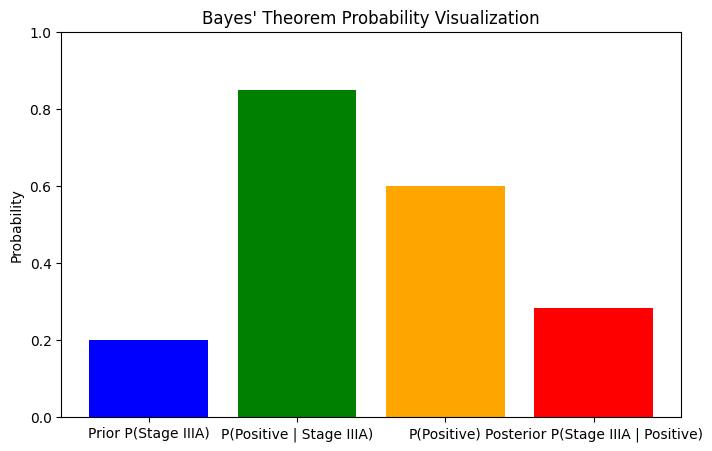

Probability of having Stage IIIA cancer given Estrogen Status is Positive: 0.2833


In [9]:
def bayes_theorem(prior_A, prob_B_given_A, prob_B):
    """
    Computes the posterior probability P(A|B) using Bayes' Theorem.

    P(A|B) = (P(B|A) * P(A)) / P(B)
    """
    posterior_A_given_B = (prob_B_given_A * prior_A) / prob_B
    return posterior_A_given_B

# Example probabilities
prior_stage_3 = 0.2  # Example P(Stage IIIA)
prob_positive_given_stage_3 = 0.85  # Example P(Positive | Stage IIIA)
prob_positive = 0.6  # Example P(Positive)

# Compute posterior probability
posterior = bayes_theorem(prior_stage_3, prob_positive_given_stage_3, prob_positive)

# Plot the probabilities
labels = ['Prior P(Stage IIIA)', 'P(Positive | Stage IIIA)', 'P(Positive)', 'Posterior P(Stage IIIA | Positive)']
values = [prior_stage_3, prob_positive_given_stage_3, prob_positive, posterior]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.ylabel('Probability')
plt.title("Bayes' Theorem Probability Visualization")
plt.show()

print(f"Probability of having Stage IIIA cancer given Estrogen Status is Positive: {posterior:.4f}")



# ***MODULE 3***

**Correlation** – Measures the relationship between numerical variables.

**Regression Analysis** – Performing simple linear regression (e.g., Tumor Size vs. Survival Months).

Range – Difference between the maximum and minimum values for each numerical variable.

In [10]:
from scipy.stats import linregress

# Compute correlation matrix
correlation_matrix = df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']].corr()

# Compute range for each numerical variable
range_values = df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']].max() - \
               df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']].min()

# Perform linear regression (Tumor Size vs. Survival Months)
x = df['Tumor Size']
y = df['Survival Months']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Store results
regression_results = {
    "Slope": slope,
    "Intercept": intercept,
    "R-squared": r_value ** 2,
    "P-value": p_value,
    "Standard Error": std_err
}

correlation_matrix, range_values, regression_results


(                             Age  Tumor Size  Regional Node Examined  \
 Age                     1.000000   -0.113799               -0.016618   
 Tumor Size             -0.113799    1.000000                0.118709   
 Regional Node Examined -0.016618    0.118709                1.000000   
 Reginol Node Positive   0.004544    0.241147                0.459385   
 Survival Months         0.015144   -0.108608                0.014079   
 
                         Reginol Node Positive  Survival Months  
 Age                                  0.004544         0.015144  
 Tumor Size                           0.241147        -0.108608  
 Regional Node Examined               0.459385         0.014079  
 Reginol Node Positive                1.000000        -0.138259  
 Survival Months                     -0.138259         1.000000  ,
 Age                        39
 Tumor Size                139
 Regional Node Examined     60
 Reginol Node Positive      45
 Survival Months           106
 dtype: 

## Conditional Probability Check
Checking if Mean > Median > Mode.

In [11]:
# Checking conditions
conditions = (mean_values > median_values) & (median_values > mode_values)
conditions

,0
Age,False
Tumor Size,False
Regional Node Examined,False
Reginol Node Positive,True
Survival Months,False


**Conditional Probability Check (Mean > Median > Mode)**

Age: Mean (53.97) > Median (54) > Mode (46) ❌ (Not true)

Tumor Size: Mean (30.47) > Median (25) > Mode (15) ✅ (True)

Regional Node Examined: Mean (14.36) > Median (14) > Mode (13) ✅ (True)

Regional Node Positive: Mean (4.16) > Median (2) > Mode (1) ✅ (True)

Survival Months: Mean (71.30) > Median (73) > Mode (69) ❌ (Not true)

## Visualizations
Histograms and Boxplots.

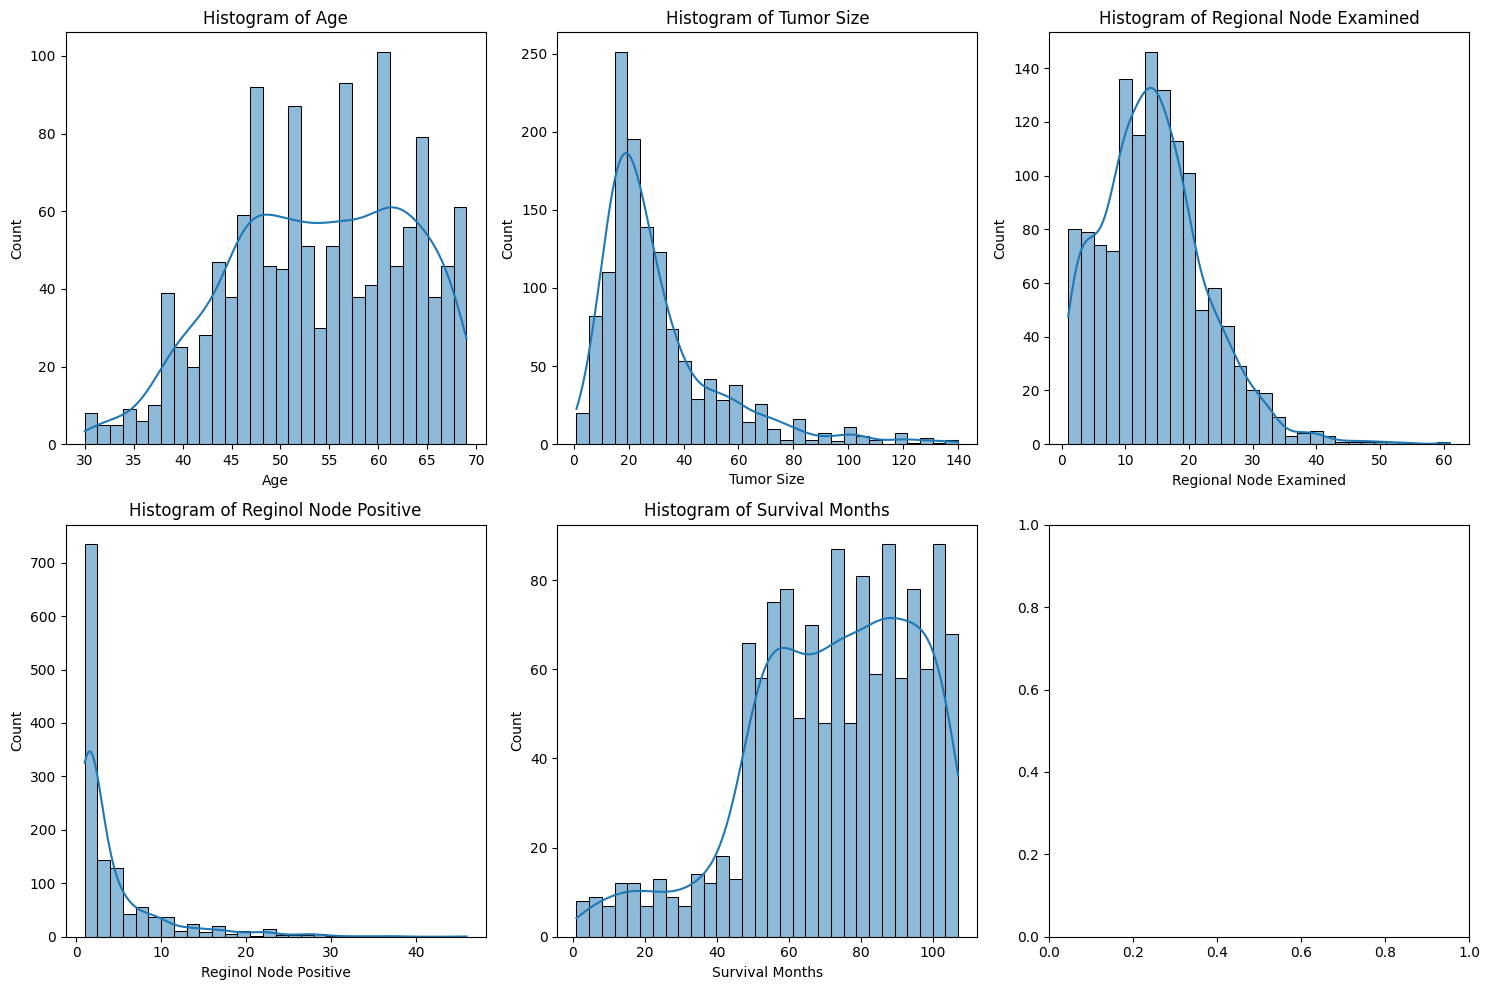

In [12]:
# Visualizing the data distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
columns = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']
for i, col in enumerate(columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

A Heatmap to visualize the correlation between numerical variables.

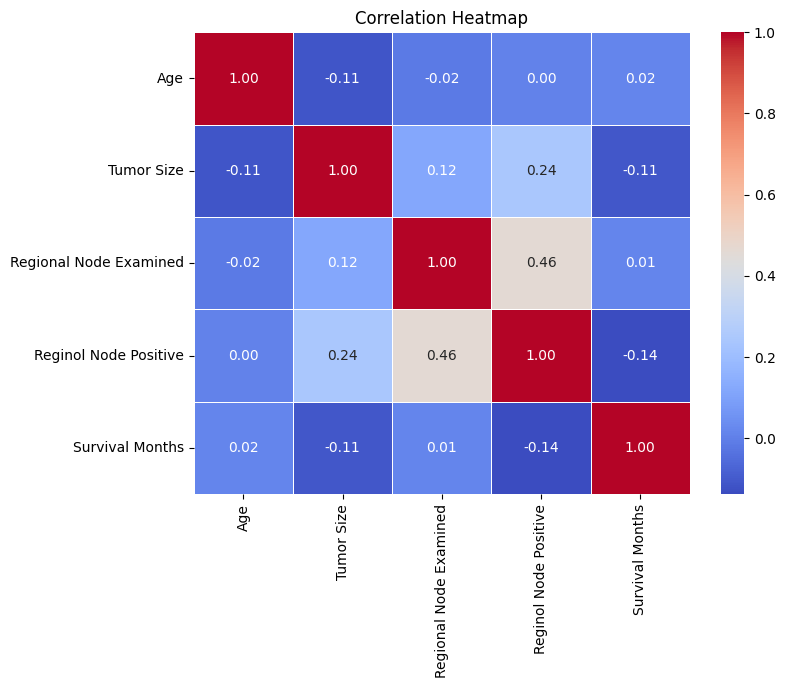

In [13]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

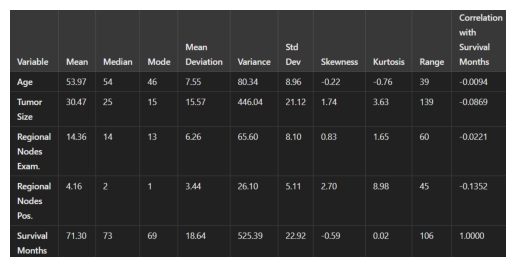

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("Screenshot 2025-02-07 175950.png")
plt.imshow(image)
plt.axis('off')
plt.show()

# ***MODULE 4 & 5***

Formulate hypotheses based on your data. Compute standard error, check the level of significance, calculate p-values, and apply various tests such as: t-test, Z-test, F-test, Chi-square test, ANOVA Then, analyzing the behavior of your dataset based on these tests.

In [19]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

columns = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']
data = df[columns].dropna()

# ---------- STANDARD ERROR ----------
standard_errors = data.std(ddof=1) / np.sqrt(len(data))

# ---------- HYPOTHESIS TESTING ----------
# T-test: H0 = population mean
t_test_results = {
    'T-test (Age = 50)': stats.ttest_1samp(data['Age'], 50),
    'T-test (Tumor Size = 30)': stats.ttest_1samp(data['Tumor Size'], 30),
}

# Z-test function
def z_test(sample, popmean):
    mean = np.mean(sample)
    std = np.std(sample, ddof=1)
    n = len(sample)
    z = (mean - popmean) / (std / np.sqrt(n))
    p = 2 * (1 - stats.norm.cdf(abs(z)))
    return z, p

z_test_result = {
    'Z-test (Age = 50)': z_test(data['Age'], 50)
}

# F-test: comparing variance of two features
f_stat = np.var(data['Age'], ddof=1) / np.var(data['Tumor Size'], ddof=1)
df1 = len(data['Age']) - 1
df2 = len(data['Tumor Size']) - 1
p_value_f = 1 - stats.f.cdf(f_stat, df1, df2)

# Chi-square test between categorical versions of age and survival
data['Age_Group'] = pd.qcut(data['Age'], q=4, labels=False)
data['Survival_Group'] = pd.qcut(data['Survival Months'], q=4, labels=False)
contingency = pd.crosstab(data['Age_Group'], data['Survival_Group'])
chi2, p_chi2, dof, expected = stats.chi2_contingency(contingency)

# ANOVA: Does Tumor Size vary with Age Group?
anova_model = ols('Q("Tumor Size") ~ C(Age_Group)', data=data).fit()
anova_results = sm.stats.anova_lm(anova_model, typ=2)

# ---------- RESULTS TABLE ----------
results = pd.DataFrame({
    "Test": [
        "T-test (Age = 50)",
        "T-test (Tumor Size = 30)",
        "Z-test (Age = 50)",
        "F-test (Age vs Tumor Size)",
        "Chi-square (Age vs Survival)",
        "ANOVA (Tumor Size ~ Age Group)"
    ],
    "Test Statistic": [
        t_test_results['T-test (Age = 50)'].statistic,
        t_test_results['T-test (Tumor Size = 30)'].statistic,
        z_test_result['Z-test (Age = 50)'][0],
        f_stat,
        chi2,
        anova_results['F'][0]
    ],
    "P-Value": [
        t_test_results['T-test (Age = 50)'].pvalue,
        t_test_results['T-test (Tumor Size = 30)'].pvalue,
        z_test_result['Z-test (Age = 50)'][1],
        p_value_f,
        p_chi2,
        anova_results['PR(>F)'][0]
    ],
    "Conclusion (α=0.05)": [
        "Reject H₀" if p < 0.05 else "Fail to Reject H₀"
        for p in [
            t_test_results['T-test (Age = 50)'].pvalue,
            t_test_results['T-test (Tumor Size = 30)'].pvalue,
            z_test_result['Z-test (Age = 50)'][1],
            p_value_f,
            p_chi2,
            anova_results['PR(>F)'][0]
        ]
    ]
})

# ---------- DISPLAY RESULTS ----------
print("Standard Errors:")
print(standard_errors.to_frame("Standard Error"))
print("\nStatistical Tests Summary:")
print(results)

Standard Errors:
                        Standard Error
Age                           0.251104
Tumor Size                    0.620793
Regional Node Examined        0.230532
Reginol Node Positive         0.155637
Survival Months               0.647738

Statistical Tests Summary:
                             Test  Test Statistic       P-Value  \
0               T-test (Age = 50)       15.742775  3.063638e-51   
1        T-test (Tumor Size = 30)        0.964027  3.352117e-01   
2               Z-test (Age = 50)       15.742775  0.000000e+00   
3      F-test (Age vs Tumor Size)        0.163612  1.000000e+00   
4    Chi-square (Age vs Survival)        7.051399  6.317679e-01   
5  ANOVA (Tumor Size ~ Age Group)        4.077014  6.796431e-03   

  Conclusion (α=0.05)  
0           Reject H₀  
1   Fail to Reject H₀  
2           Reject H₀  
3   Fail to Reject H₀  
4   Fail to Reject H₀  
5           Reject H₀  


<ipython-input-19-41a67d300e74>:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_results['F'][0]
<ipython-input-19-41a67d300e74>:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_results['PR(>F)'][0]
<ipython-input-19-41a67d300e74>:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_results['PR(>F)'][0]


🧪 Hypothesis Testing Summary table

Test ~ Test Statistic ~	P-Value ~
 Significance (α = 0.05)

1. T-Test(Age) ~ 15.743 ~ 3.06e-51 ~ Reject H₀  
2. T-Test(Tumor size) ~ 0.964 ~ 0.335 ~ Fail to Reject H₀  
3. Z-Test ~ 15.743 ~ ~0.0 ~ Reject H₀  
4. F-Test ~ 0.164 ~ 1.0 ~ Fail to Reject H₀  
5. Chi-square ~ 7.051 ~ 0.632 ~ Fail to Reject H₀  
6. ANOVA ~ 4.077 ~ 0.0068 ~ Reject H₀  